In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('poster')

from deep_hvac.util import NsrdbReader
from deep_hvac import postprocess

In [72]:
ls ../data

1704559_29.72_-95.35_2018.csv          ercot-2019-rt.xlsx
1704559_29.72_-95.35_2019.csv          houston-2018-prices.pickle
DefaultBuilding-v0-action-continuous/  houston-2019-prices.pickle
DefaultBuilding-v0-action-discrete/    results-expert.pickle
ercot-2018-rt.xlsx                     tmp/


In [73]:
prices_2018 = pd.read_pickle('../data/houston-2018-prices.pickle').resample('1H').mean()
prices_2019 = pd.read_pickle('../data/houston-2019-prices.pickle').resample('1H').mean()
weather_2018 = NsrdbReader('../data/1704559_29.72_-95.35_2018.csv').weather_hourly
weather_2019 = NsrdbReader('../data/1704559_29.72_-95.35_2019.csv').weather_hourly

In [79]:
prices_2018['Settlement Point Price Next'] = prices_2018['Settlement Point Price'].shift(-1)
prices_2018['Settlement Point Price Next'].ffill(inplace=True)
diff = prices_2018['Settlement Point Price Next'] - prices_2018['Settlement Point Price']
prices_2018['pct_change'] = diff / prices_2018['Settlement Point Price'].abs()
prices_2018['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)
prices_2018['diff'] = diff

<AxesSubplot:>

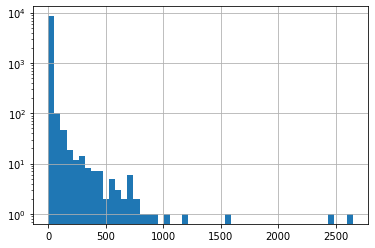

In [97]:
prices_2018['diff'].abs().hist(bins=50, log=True)
# plt.xscale('log')

<AxesSubplot:>

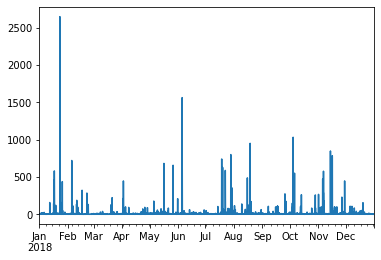

In [105]:
prices_2018['diff'].abs().plot()

Text(0, 0.5, 'Price [$/kWh]')

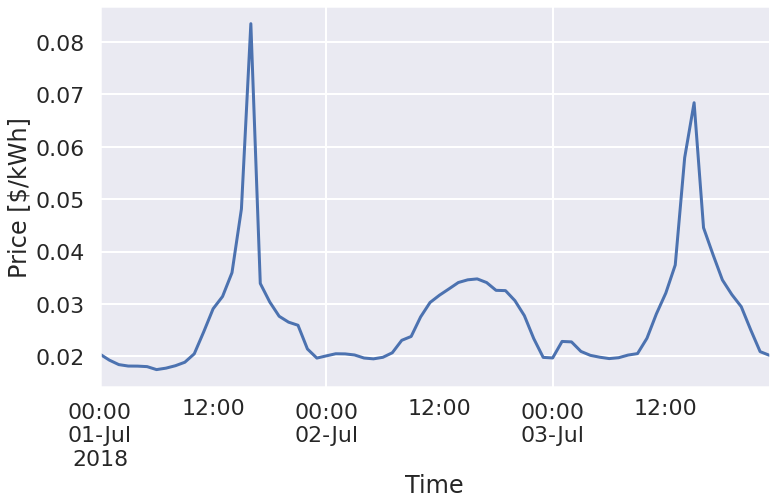

In [116]:
(prices_2018['Settlement Point Price'] / 1000).loc[
    '2018-07-01':'2018-07-03'].plot(figsize=(12, 7))
plt.xlabel('Time')
plt.ylabel('Price [$/kWh]')

In [101]:
prices_2018.loc[prices_2018['diff'].abs() > 50]

,Settlement Point Price,Settlement Point Price Next,pct_change,diff
2018-01-12 05:00:00-06:00,33.2050,191.2300,4.759072,158.0250
2018-01-12 06:00:00-06:00,191.2300,42.3075,-0.778761,-148.9225
2018-01-16 11:00:00-06:00,59.4375,199.4150,2.355037,139.9775
2018-01-16 12:00:00-06:00,199.4150,54.4400,-0.727001,-144.9750
2018-01-16 16:00:00-06:00,41.6950,412.4500,8.892073,370.7550
...,...,...,...,...
2018-12-18 17:00:00-06:00,83.9175,29.0300,-0.654065,-54.8875
2018-12-19 16:00:00-06:00,24.5725,180.1100,6.329739,155.5375
2018-12-19 17:00:00-06:00,180.1100,37.7700,-0.790295,-142.3400
2018-12-19 20:00:00-06:00,34.8775,98.8275,1.833560,63.9500


In [104]:
prices_2018['pct_change'].abs().mean()

0.35519958001253227

Text(0.5, 1.0, 'ERCOT prices, summer')

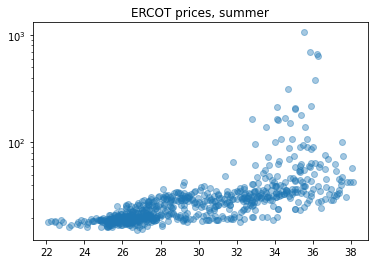

In [67]:
plt.scatter(weather_2018['Temperature'].iloc[7*24*30:8*24*30],
            prices_2018['Settlement Point Price'].iloc[7*24*30:8*24*30],
            alpha=0.4)
plt.yscale('log')
plt.title("ERCOT prices, summer")

In [ ]:
postprocess()